<a href="https://colab.research.google.com/github/samofuture/ML-Final-Project/blob/main/Final_Project_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

dataset_url = 'https://raw.githubusercontent.com/samofuture/ML-Final-Project/main/dataset.csv'

In [8]:
url = 'https://raw.githubusercontent.com/samofuture/ML-Final-Project/main/dataset.csv'
df = pd.read_csv(url)

In [9]:
def prep_data() -> pd.DataFrame:
    df = pd.read_csv(dataset_url)
    df['Target'] = df['Target'].apply(lambda x: 2 if x == 'Graduate' else 1 if x == 'Enrolled' else 0)
    return df

In [10]:
df = prep_data()
target = df.pop('Target').to_numpy()
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,6,1,11,1,1,1,1,3,4,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,5,1,1,1,22,27,10,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,8,2,15,1,1,1,23,27,6,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,12,1,3,0,1,1,22,28,10,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06
4420,1,1,2,15,1,1,19,1,1,10,...,0,0,6,6,2,11.000000,0,11.1,0.6,2.02
4421,1,1,1,12,1,1,1,22,27,10,...,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79
4422,1,1,1,9,1,1,1,22,27,8,...,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12


In [18]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

# Train an SVM model
svm_model = SVC(kernel='linear')  # You can choose different kernels like 'rbf', 'poly', etc.
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)


Accuracy: 0.7581920903954802
Confusion Matrix:
[[236  32  48]
 [ 33  48  70]
 [  8  23 387]]


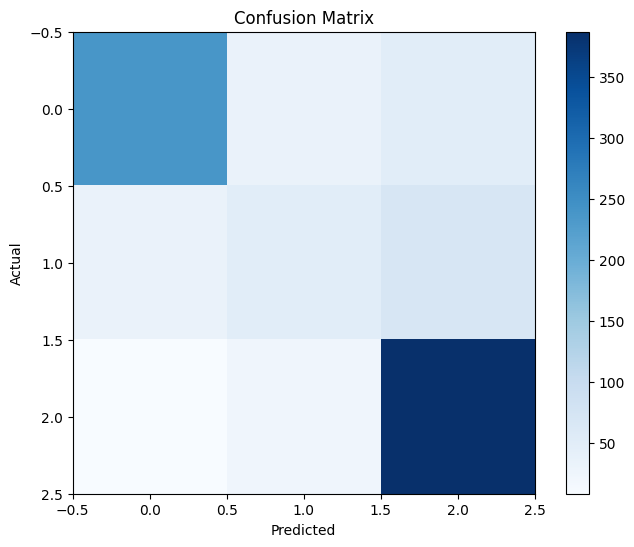

In [19]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

# Generate graphs using matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()

# Adding labels
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()